In [23]:
%matplotlib inline
#%matplotlib notebook
from pdfstream.transformation.cli import transform
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from pdfstream.io import load_array
from pdfstream.transformation.io import load_pdfconfig, write_pdfgetter
from pdfstream.transformation.main import get_pdf
from pathlib import Path
from diffpy.pdfgetx import PDFConfig

In [24]:
def globfilename(path, search_item='*.tiff'):
    filenames = glob.glob(path+search_item)
    inputnames=[filename.replace('\\','/') for filename in filenames]
    return(inputnames)

def transform_bkg(
    cfg_file,
    data_file: str,
    output_dir: str = ".",
    plot_setting: typing.Union[str, dict] = None,
    test: bool = False,
) -> typing.Dict[str, str]:
    """Transform the data."""
    if isinstance(cfg_file,str):
        pdfconfig = load_pdfconfig(cfg_file)
    else:
        pdfconfig = cfg_file
    
    chi = load_array(data_file)
    pdfgetter = get_pdf(pdfconfig, chi, plot_setting=plot_setting)
    filename = Path(data_file).stem
    dct = write_pdfgetter(output_dir, filename, pdfgetter)
    if not test:
        plt.show()
    return dct


def count_header(filename):
    # count header 
    with open (filename,'r') as myfile:
        data = myfile.read().splitlines()
    count = 0
    for i, lines in enumerate(data):
        if lines == '#### start data':
            count =i
    return count+2

def find_qmax(filename, ave_cutoff=8e-03, window_length=21):
    
    header_count=count_header(filename)
    q, f = np.loadtxt(filename, skiprows= header_count, unpack=True)
    qmax = q[-1]
    fhat = savgol_filter(f, window_length, 3)
    fdiff=f-fhat
    zero_cross = np.where(np.diff(np.signbit(fhat)))[0]
    z=zero_cross[::-1]
    for i, i_zero in enumerate(z):
        ave=np.average(abs(fdiff[i_zero:]))

        if ave > ave_cutoff:
            print(i_zero, q[i_zero], ave)
        else:
            qmax = np.round(q[z[i-1]],1)
            print(i_zero, q[i_zero], ave)
            print(f'qmax ={qmax}')
            break    
    plt.figure(figsize=(16,8))            
    plt.plot(q,f)
    plt.plot(q, fhat, 'r')

    plt.plot(q, (f-fhat))   
    print(qmax)
    return qmax

In [25]:
homepath='/nsls2/users/hzhong/pdfstream/'
testpath = './chi_files/'
output_dir=homepath
testfiles = globfilename(testpath, "*.chi")
testfile =testfiles[1]
bkg_file = testfiles[0]

In [26]:
pdfconfig = PDFConfig()
#pdfconfig.readConfig(cfg_file)
config_file= globfilename('./','*.cfg')[0]
pdfconfig.readConfig(config_file)
pdfconfig.backgroundfiles = bkg_file
pdfconfig.bgscale=0.9
print(pdfconfig)



configfile = ./pdfconfig.cfg
configsection = DEFAULT
dataformat = twotheta
inputfiles = []
backgroundfiles = ['./chi_files/CsPbBr3_High_air_20240208-173616_6ce08a_primary-1_mean_tth.chi']
datapath = []
output = 
outputtypes = ['fq', 'gr']
force = False
mode = xray
wavelength = 0.1824
twothetazero = 0.0
composition = Si
bgscales = [0.9]
rpoly = 0.9
qmaxinst = 24.0
qmin = 1.0
qmax = 20.0
rmin = 0.1
rmax = 15.0
rstep = 0.01
plot = []
interact = False
verbose = None


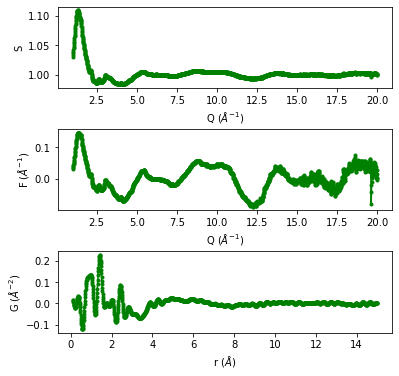

[{'fq': '/nsls2/users/hzhong/pdfstream/fq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.fq',
  'gr': '/nsls2/users/hzhong/pdfstream/gr/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.gr'}]

In [27]:
transform('pdfconfig.cfg', testfile, output_dir=output_dir, plot_setting={'marker':'.','color':'green'} )

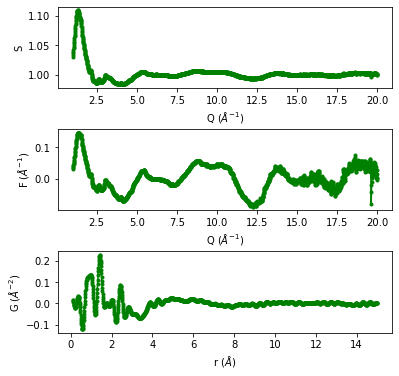

{'fq': '/nsls2/users/hzhong/pdfstream/fq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.fq',
 'gr': '/nsls2/users/hzhong/pdfstream/gr/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.gr'}

In [28]:
transform_bkg('pdfconfig.cfg', testfile, output_dir=output_dir, plot_setting={'marker':'.','color':'green'} )

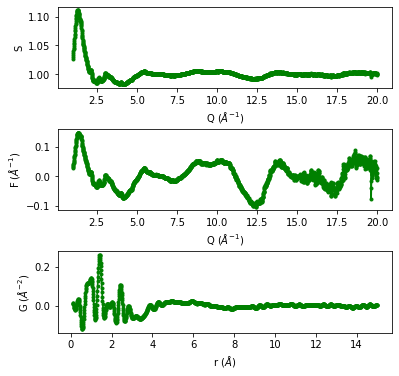

{'fq': '/nsls2/users/hzhong/pdfstream/fq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.fq',
 'gr': '/nsls2/users/hzhong/pdfstream/gr/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.gr'}

In [29]:
transform_bkg(pdfconfig, testfile, output_dir=output_dir, plot_setting={'marker':'.','color':'green'} )

configfile = ./pdfconfig.cfg
configsection = DEFAULT
dataformat = twotheta
inputfiles = []
backgroundfiles = ['./chi_files/CsPbBr3_High_air_20240208-173616_6ce08a_primary-1_mean_tth.chi']
datapath = []
output = 
outputtypes = ['sq', 'fq', 'gr']
force = False
mode = xray
wavelength = 0.1824
twothetazero = 0.0
composition = Si
bgscales = [1]
rpoly = 0.9
qmaxinst = 24.0
qmin = 1.0
qmax = 20
rmin = 0.1
rmax = 15
rstep = 0.01
plot = []
interact = False
verbose = None


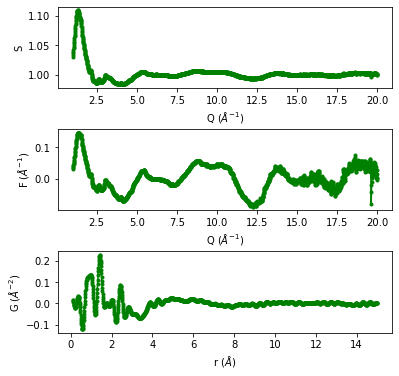

{'sq': '/nsls2/users/hzhong/pdfstream/sq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.sq',
 'fq': '/nsls2/users/hzhong/pdfstream/fq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.fq',
 'gr': '/nsls2/users/hzhong/pdfstream/gr/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.gr'}

In [30]:
pdfconfig = PDFConfig()
config_file= globfilename('./','*.cfg')[0]
pdfconfig.readConfig(config_file)
pdfconfig.qmaxinst = 24.0
pdfconfig.qmin=1.0
pdfconfig.qmax=20
pdfconfig.rpoly=0.9
pdfconfig.rmin=0.1
pdfconfig.rmax=15
pdfconfig.rpoly=0.9
pdfconfig.bgscale=1
pdfconfig.outputtypes=['sq','fq','gr']
print(pdfconfig)
transform_bkg(pdfconfig, testfile, output_dir=output_dir, plot_setting={'marker':'.','color':'green'} )


/nsls2/users/hzhong/pdfstream/fq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.fq
1870 17.8547 0.010448454461272075
1716 16.4674 0.009153133325120728
1657 15.9359 0.009227400763456493
1651 15.8819 0.009199229432592958
1650 15.8729 0.009217871619726311
1643 15.8098 0.009252368181224465
1632 15.7107 0.009194431253175952
1499 14.5126 0.008146883867410257
1359 13.2514 0.007295338630837125
qmax =14.5
14.5


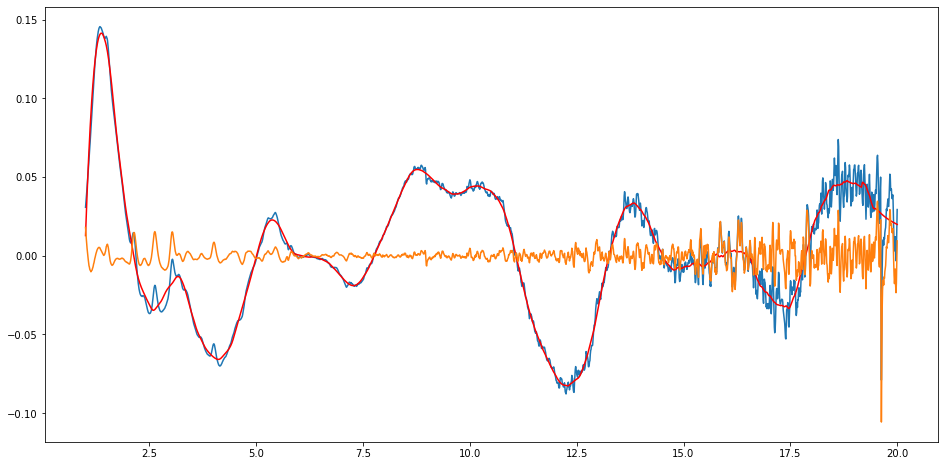

In [31]:


fqfile = globfilename(output_dir, '*/*.fq')[1]
print(fqfile)

qmax=find_qmax(fqfile,  ave_cutoff=8e-03, window_length=101)


configfile = ./pdfconfig.cfg
configsection = DEFAULT
dataformat = twotheta
inputfiles = []
backgroundfiles = ['./chi_files/CsPbBr3_High_air_20240208-173616_6ce08a_primary-1_mean_tth.chi']
datapath = []
output = 
outputtypes = ['sq', 'fq', 'gr']
force = False
mode = xray
wavelength = 0.1824
twothetazero = 0.0
composition = Si
bgscales = [1]
rpoly = 0.9
qmaxinst = 24.0
qmin = 1.0
qmax = 14.5
rmin = 0.1
rmax = 15
rstep = 0.01
plot = []
interact = False
verbose = None


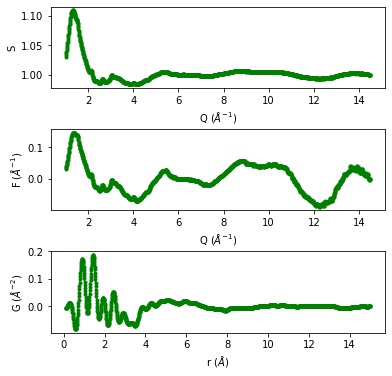

{'sq': '/nsls2/users/hzhong/pdfstream/sq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.sq',
 'fq': '/nsls2/users/hzhong/pdfstream/fq/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.fq',
 'gr': '/nsls2/users/hzhong/pdfstream/gr/Toluene_OA_High_air_20240208-173554_301930_primary-1_mean_tth.gr'}

In [32]:
pdfconfig.qmax=qmax
print(pdfconfig)
transform_bkg(pdfconfig, testfile, output_dir=output_dir, plot_setting={'marker':'.','color':'green'} )
